# Data Cleaning & Exploration


Keywords to know:

LI - Low Income
LA - Low Access

Data Dictionaries for data_2010 and data_2019 can be found under `datasets/original_data_files` in the second sheets of the original Excel files. 

More information on data decisions can be found in `datasets/original_data_files/FoodAccessResearchAtlasDocumentation2010.pdf`

!!!! 

### K note: any unused or seemingly cluttered cells have been commented out and moved to the final section below titled "Cell Graveyard". We can decide what we want to keep.

!!!!

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Reading in Data

Please ensure you have all datasets available in the datasets folder. If you do not, please check the Google Drive for all datasets that can't be uploaded to GitHub.

In [26]:
data_2019 = pd.read_csv('../datasets/2019.csv', index_col=0)

In [27]:
data_2010 = pd.read_csv('../datasets/2010.csv', index_col=0)

In [28]:
data_SVI = pd.read_csv('../datasets/2018_SVI.csv', index_col=0)

In [29]:
data_CDC = pd.read_csv('../datasets/2019_CDC.csv', index_col=0)

The 2019 dataset has 147 columns. The 2010 dataset has 65 columns. 

In [30]:
data_2019.columns = data_2019.columns.str.lower()

In [31]:
data_2010.columns = data_2010.columns.str.lower()

In [32]:
data_SVI.columns = data_SVI.columns.str.lower()

In [33]:
data_CDC.columns = data_CDC.columns.str.lower()

In [34]:
data_2010.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

--------
## 2. Checking differences between 2010 and 2019

In [35]:
# difference between 2010 and 2019 columns
set(data_2010.columns) - set(data_2019.columns)

{'rural', 'uatyp10'}

In [36]:
# difference between 2019 columns and 2010 columns
set(data_2019.columns) - set(data_2010.columns)

{'laaian1',
 'laaian10',
 'laaian10share',
 'laaian1share',
 'laaian20',
 'laaian20share',
 'laaianhalf',
 'laaianhalfshare',
 'laasian1',
 'laasian10',
 'laasian10share',
 'laasian1share',
 'laasian20',
 'laasian20share',
 'laasianhalf',
 'laasianhalfshare',
 'lablack1',
 'lablack10',
 'lablack10share',
 'lablack1share',
 'lablack20',
 'lablack20share',
 'lablackhalf',
 'lablackhalfshare',
 'lahisp1',
 'lahisp10',
 'lahisp10share',
 'lahisp1share',
 'lahisp20',
 'lahisp20share',
 'lahisphalf',
 'lahisphalfshare',
 'lalowi05_10',
 'lalowi1_10',
 'lalowi1_20',
 'lanhopi1',
 'lanhopi10',
 'lanhopi10share',
 'lanhopi1share',
 'lanhopi20',
 'lanhopi20share',
 'lanhopihalf',
 'lanhopihalfshare',
 'laomultir1',
 'laomultir10',
 'laomultir10share',
 'laomultir1share',
 'laomultir20',
 'laomultir20share',
 'laomultirhalf',
 'laomultirhalfshare',
 'lapop05_10',
 'lapop1_10',
 'lapop1_20',
 'lasnap1',
 'lasnap10',
 'lasnap10share',
 'lasnap1share',
 'lasnap20',
 'lasnap20share',
 'lasnaphalf',
 

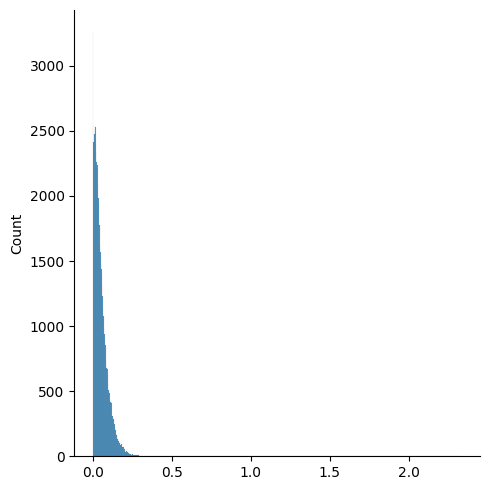

In [37]:
sns.displot(data_2019['tractsnap']/data_2019['pop2010']);

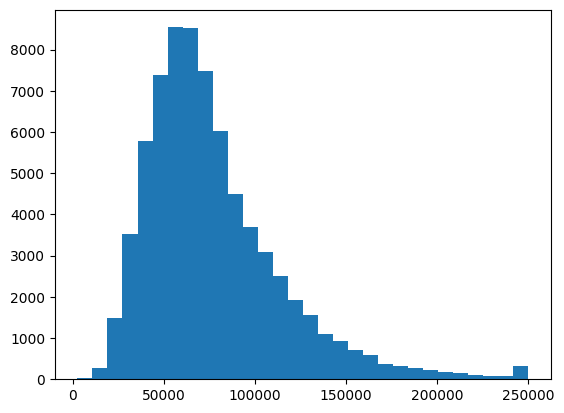

In [38]:
plt.hist(data_2019['medianfamilyincome'], bins=30);

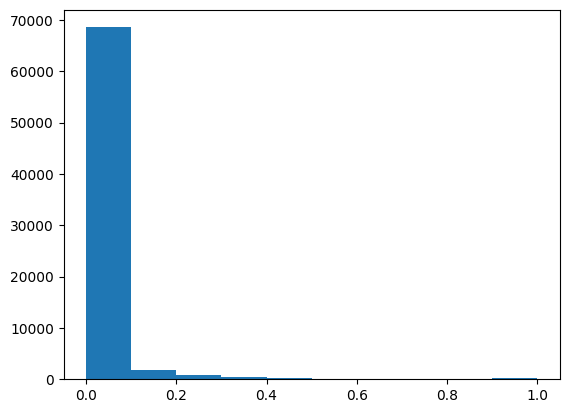

In [39]:
plt.hist(data_2010['pctgqtrs']);

In [40]:
data_2010['lowincometracts'].value_counts(normalize=True)

0    0.598087
1    0.401913
Name: lowincometracts, dtype: float64

In [41]:
data_2019['lowincometracts'].value_counts(normalize=True)

0    0.582427
1    0.417573
Name: lowincometracts, dtype: float64

In [42]:
pd.set_option('display.max_columns', None)

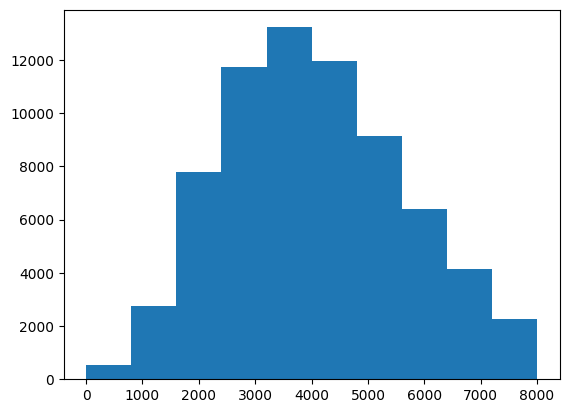

In [43]:
plt.hist(data_2019[data_2019['pop2010'] <= 8000]['pop2010']);

----

## 3. Mapping zip codes to census tracts

In [44]:
# %pip install openpyxl

In [45]:
#check-if-used for entire section

In [46]:
zip_2010 = pd.read_excel('../datasets/original_data_files/zip_tracts/ZIP_TRACT_032010.xlsx', dtype='category')

/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/par

In [47]:
zip_2019 = pd.read_excel('../datasets/original_data_files/zip_tracts/ZIP_TRACT_032019.xlsx', dtype='category')

/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:761: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cats = Index(values).unique().dropna()
/Users/derryzrli/opt/anaconda3/envs/sktime_env/lib/python3.9/site-packages/pandas/io/par

In [48]:
zip_2010.columns = zip_2010.columns.str.lower()

In [49]:
zip_2010.head(1)

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00501,36103158607,0.0,1.0,0.0,1.0


In [50]:
zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2010[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [51]:
zip_2010.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [52]:
zip_2019.head(1)

,zip,tract,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,00601,72001956600,0.167449,0.366569,0.412281,0.183442


In [53]:
zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']] = zip_2019[['res_ratio', 'bus_ratio','oth_ratio', 'tot_ratio']].astype(np.float64)

In [54]:
zip_2019.dtypes

zip          category
tract        category
res_ratio     float64
bus_ratio     float64
oth_ratio     float64
tot_ratio     float64
dtype: object

In [55]:
data_2019.head(1)

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.0,0,0,0,0,0,0,11.336453,81250.0,1,1,1,1,1,0,0,0,1896.493338,1912.000004,1896.493338,460.998748,466.972228,460.998748,1912.000004,100.0,466.972228,24.423234,507.000002,26.516736,221.000002,11.558578,1622.000008,84.832636,216.999999,11.349372,14.0,0.732218,0.0,0.0,14.0,0.732218,45.0,2.353556,44.0,2.301255,5.490446,0.792272,92.400001,13.333333,1896.493338,99.188982,460.998748,24.110813,503.506034,26.333998,218.674825,11.436968,1610.956368,84.25504,213.631073,11.173173,13.800985,0.721809,0.0,0.0,14.0,0.732218,44.104914,2.306742,43.365253,2.268057,5.490446,0.792272,91.580907,13.215138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0


In [56]:
zip_2010.shape

(145629, 6)

In [57]:
zip_2019.shape

(170150, 6)

Standardizing the censustract numbers:

In [58]:
data_2019.censustract = data_2019.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)
data_2010.censustract = data_2010.censustract.astype('category').apply(lambda x: '0'+ str(x) if len(str(x))==10 else x)

In [59]:
data_2010_zip = pd.merge(data_2010, zip_2010, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])
data_2019_zip = pd.merge(data_2019, zip_2019, how='left', left_on='censustract', right_on='tract')
# .dropna(subset=['zip','tract','res_ratio','bus_ratio','oth_ratio','tot_ratio'])

In [60]:
data_2010.shape

(72864, 65)

In [61]:
data_2010_zip.shape

(81230, 71)

In [62]:
data_2019_zip.shape

(86237, 153)

In [63]:
zip_2019.tract.nunique()

73488

In [64]:
data_2010_zip.columns

Index(['censustract', 'state', 'county', 'lilatracts_1and10',
       'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle',
       'urban', 'rural', 'la1and10', 'lahalfand10', 'la1and20',
       'latracts_half', 'latracts1', 'latracts10', 'latracts20',
       'latractsvehicle_20', 'hunvflag', 'groupquartersflag', 'ohu2010',
       'numgqtrs', 'pctgqtrs', 'lowincometracts', 'pop2010', 'uatyp10',
       'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare',
       'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare',
       'lahunvhalf', 'lahunvhalfshare', 'lapop1', 'lapop1share', 'lalowi1',
       'lalowi1share', 'lakids1', 'lakids1share', 'laseniors1',
       'laseniors1share', 'lahunv1', 'lahunv1share', 'lapop10', 'lapop10share',
       'lalowi10', 'lalowi10share', 'lakids10', 'lakids10share', 'laseniors10',
       'laseniors10share', 'lahunv10', 'lahunv10share', 'lapop20',
       'lapop20share', 'lalowi20', 'lalowi20share', 'lakids20',
       'l

In [65]:
col_diff = [i for i in data_2019_zip.columns if i not in data_2010_zip.columns ]
col_diff[:10]

['povertyrate',
 'medianfamilyincome',
 'lapop1_10',
 'lapop05_10',
 'lapop1_20',
 'lalowi1_10',
 'lalowi05_10',
 'lalowi1_20',
 'lawhitehalf',
 'lawhitehalfshare']

In [66]:
col_same = [i for i in data_2010_zip.columns if i in data_2019_zip.columns ]
col_same[:10]

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'urban',
 'la1and10',
 'lahalfand10']

In [67]:
col_2010 = col_same[:7]+['hunvflag']

In [68]:
col_2019 = col_same[:7]+['hunvflag', 'tracthunv', 'povertyrate',]
col_2019[:10]

['censustract',
 'state',
 'county',
 'lilatracts_1and10',
 'lilatracts_halfand10',
 'lilatracts_1and20',
 'lilatracts_vehicle',
 'hunvflag',
 'tracthunv',
 'povertyrate']

In [69]:
df_2019_small = data_2019[col_2019]

In [70]:
df_2010_small = data_2010[col_2010]

----

## 4. Isolating District of Columbia from 2010 and 2019 datasets

In [71]:
data_2010_dc = data_2010[data_2010['state']=='DC']
data_2019_dc = data_2019[data_2019['state']=='District of Columbia']

### Functions to get food desert status difference between 2010 and 2019

- get_lila_0_1 will return tracts that were not food deserts in 2010 and became food deserts in 2019.

- get_lila_1_0 will return tracts that were food deserts in 2010 and became food-accessible in 2019

- get_lila_0_0 will return tracts that remained food accessible.

- get_lila_1_1 will return tracts that remained food deserts.

In [72]:
def get_lila_0_1(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==1) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==0].censustract))]

In [73]:
def get_lila_1_0(state,state_abr, metric):
#     
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==0) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==1].censustract))]

In [74]:
def get_lila_0_0(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==0) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==0].censustract))]

In [75]:
def get_lila_1_1(state,state_abr, metric):
    
    data_2010_state = data_2010[data_2010['state']==state_abr]
    data_2019_state = data_2019[data_2019['state']==state]
    
    return data_2019_state[(data_2019_state[metric]==1) & 
                           (data_2019_state.censustract.isin(data_2010_state[data_2010_state[metric]==1].censustract))]

### Function to quickly create DFs

This function takes in a dataframe, state, and statistic, and creates a new dataframe which is a copy of the input with additional columns that show the changes in food desert status as well as a 'food_desert_status' column that shows a human-readable answer to whether the census tract became or remained either food accessible or a food desert. 

In [76]:
def add_quad_cols_and_stat_col(df, state, state_abr, stat): 
    
    df_new = df.copy()
    df_new['lila_0_0'] = list(df.censustract.isin(get_lila_0_0(state, state_abr, stat).censustract))
    df_new['lila_0_1'] = list(df.censustract.isin(get_lila_0_1(state, state_abr, stat).censustract))
    df_new['lila_1_0'] = list(df.censustract.isin(get_lila_1_0(state, state_abr, stat).censustract))
    df_new['lila_1_1'] = list(df.censustract.isin(get_lila_1_1(state, state_abr, stat).censustract))
    
    df_new['food_desert_status'] = list(df_new[['lila_0_0', 'lila_0_1', 'lila_1_0', 'lila_1_1']].columns[np.where(df_new[['lila_0_0', 'lila_0_1', 'lila_1_0', 'lila_1_1']]!=0)[1]])
    df_new['food_desert_status'] = df_new['food_desert_status'].replace({'lila_0_0':'remained_food_accessible', 'lila_0_1': 'became_food_desert', 'lila_1_1': 'remained_food_desert', 'lila_1_0': 'became_food_accessible'})
    
    return df_new

In [77]:
data_2019_dc_1and10 = add_quad_cols_and_stat_col(data_2019_dc, 'District of Columbia', 'DC', 'lilatracts_1and10')
data_2019_dc_1and10[:3]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.634350,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.329450,0.006737,3.897334,0.079700,9.200890,0.188157,9.260688,0.344776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible
13860,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908.0,99.795710,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0,0,0,0,NaN,3031.326509,NaN,NaN,970.024489,NaN,3031.326509,77.408746,970.024489,24.770799,10.907936,0.278548,20.642347,0.527128,2273.006718,58.044094,200.384031,5.117059,374.838277,9.571968,3.895691,0.099481,5.453968,0.139274,173.747843,4.436870,213.556637,5.453438,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,14.0,41.0,2940.0,259.0,482.0,5.0,7.0,223.0,275.0,0.0,0.0,True,False,False,False,remained_food_accessible
13861,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135.0,20.921659,0,0,0,0,0,0,16.806958,250001.0,0,0,0,0,0,0,0,0,NaN,331.021394,NaN,NaN,145.674807,NaN,331.021394,6.101777,145.674807,2.685250,3.876996,0.071465,9.263843,0.170762,249.009299,4.590033,21.057323,0.388153,38.732580,0.713965,0.000000,0.000000,0.715641,0.013192,21.506544,0.396434,29.431945,0.542524,10.052618,0.520053,0.596934,0.030881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [78]:
data_2019_dc_halfand10 = add_quad_cols_and_stat_col(data_2019_dc, 'District of Columbia', 'DC', 'lilatracts_halfand10')
data_2019_dc_halfand10[:3]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.634350,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.329450,0.006737,3.897334,0.079700,9.200890,0.188157,9.260688,0.344776,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible
13860,11001000201,District of Columbia,District of Columbia,1,3916,2,1,3908.0,99.795710,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0,0,0,0,NaN,3031.326509,NaN,NaN,970.024489,NaN,3031.326509,77.408746,970.024489,24.770799,10.907936,0.278548,20.642347,0.527128,2273.006718,58.044094,200.384031,5.117059,374.838277,9.571968,3.895691,0.099481,5.453968,0.139274,173.747843,4.436870,213.556637,5.453438,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,14.0,41.0,2940.0,259.0,482.0,5.0,7.0,223.0,275.0,0.0,0.0,True,False,False,False,remained_food_accessible
13861,11001000202,District of Columbia,District of Columbia,1,5425,1933,0,1135.0,20.921659,0,0,0,0,0,0,16.806958,250001.0,0,0,0,0,0,0,0,0,NaN,331.021394,NaN,NaN,145.674807,NaN,331.021394,6.101777,145.674807,2.685250,3.876996,0.071465,9.263843,0.170762,249.009299,4.590033,21.057323,0.388153,38.732580,0.713965,0.000000,0.000000,0.715641,0.013192,21.506544,0.396434,29.431945,0.542524,10.052618,0.520053,0.596934,0.030881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

----

## 5. Exploring descriptive statistics for CDC and SVI data

------

#### 5.1) Social vulnerability indicators (poverty, employment status, income levels, educational attainment, civilian with disability, single-parent households, minority)

For all DC census tracts

In [79]:
data_SVI[['e_totpop','e_hu', 'e_hh', 'e_pci', 'ep_pov', 'ep_unemp','ep_nohsdp', 'ep_disabl', 'ep_sngpnt', 'ep_minrty', 'ep_noveh']].describe()

,e_totpop,e_hu,e_hh,e_pci,ep_pov,ep_unemp,ep_nohsdp,ep_disabl,ep_sngpnt,ep_minrty,ep_noveh
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3824.011173,1740.474860,1571.631285,51810.351955,17.501676,8.947486,9.789944,12.389385,9.725140,65.311173,28.329609
std,1400.244537,804.149228,743.903437,29319.748752,13.101023,7.468521,7.114758,6.231196,9.907379,28.802288,78.825761
min,60.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000
25%,2849.000000,1250.500000,1085.000000,27119.000000,6.850000,3.550000,3.400000,7.450000,2.200000,36.600000,21.300000
50%,3502.000000,1569.000000,1428.000000,45057.000000,14.100000,6.300000,9.100000,11.500000,6.100000,70.800000,34.300000
75%,4717.000000,2090.000000,1869.500000,74487.000000,24.250000,12.250000,14.050000,17.150000,15.200000,95.100000,46.050000
max,7805.000000,5203.000000,4811.000000,137970.000000,70.000000,41.500000,28.600000,33.000000,50.000000,100.000000,79.900000


### K note: 

I am assuming that the dataframe that Joe wanted to merge with data_SVI is actually data_2019_dc_1and10, not data_2019_dc. Derry recently updated the functions, and therefore data_2019_dc does not have 'food_desert_status', but data_2019_dc_1and10 does. 


In [80]:
# Merge data_2019_dc with data_SVI so pull descriptive statistics using food_desert status filters
data_2019_dc_svi = data_2019_dc_1and10.merge(data_SVI, how = 'left', left_on= 'censustract', right_on='fips')
data_2019_dc_svi.head(1)

,censustract,state_x,county_x,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status,state_y,st_abbr,stcnty,county_y,fips,location,area_sqmi,e_totpop,m_totpop,e_hu,m_hu,e_hh,m_hh,e_pov,m_pov,e_unemp,m_unemp,e_pci,m_pci,e_nohsdp,m_nohsdp,e_age65,m_age65,e_age17,m_age17,e_disabl,m_disabl,e_sngpnt,m_sngpnt,e_minrty,m_minrty,e_limeng,m_limeng,e_munit,m_munit,e_mobile,m_mobile,e_crowd,m_crowd,e_noveh,m_noveh,e_groupq,m_groupq,ep_pov,mp_pov,ep_unemp,mp_unemp,ep_pci,mp_pci,ep_nohsdp,mp_nohsdp,ep_age65,mp_age65,ep_age17,mp_age17,ep_disabl,mp_disabl,ep_sngpnt,mp_sngpnt,ep_minrty,mp_minrty,ep_limeng,mp_limeng,ep_munit,mp_munit,ep_mobile,mp_mobile,ep_crowd,mp_crowd,ep_noveh,mp_noveh,ep_groupq,mp_groupq,epl_pov,epl_unemp,epl_pci,epl_nohsdp,spl_theme1,rpl_theme1,epl_age65,epl_age17,epl_disabl,epl_sngpnt,spl_theme2,rpl_theme2,epl_minrty,epl_limeng,spl_theme3,rpl_theme3,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,spl_theme4,rpl_theme4,spl_themes,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4,f_total,e_uninsur,m_uninsur,ep_uninsur,mp_uninsur,e_daypop
0,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.63435,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.32945,0.006737,3.897334,0.0797,9.20089,0.188157,9.260688,0.344776,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible,DISTRICT OF COLUMBIA,DC,11001,District of Columbia,11001000100,"Census Tract 1, District of Columbia, District...",0.736532,5160,480,2805,131,2351,186,290,227,79,63,136192,23358,110,92,864,160,889,241,195,103,124,92,1232,664,2



#### (1 of 4) For DC tracts: remained_food_desert 

In [81]:
data_2019_dc_svi[data_2019_dc_svi['food_desert_status']=="remained_food_desert"][['e_totpop','e_hu', 'e_hh', 'e_pci', 'ep_pov', 'ep_unemp','ep_nohsdp', 'ep_disabl', 'ep_sngpnt', 'ep_minrty', 'ep_noveh']].describe()

,e_totpop,e_hu,e_hh,e_pci,ep_pov,ep_unemp,ep_nohsdp,ep_disabl,ep_sngpnt,ep_minrty,ep_noveh
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3406.000000,1497.166667,1336.000000,25281.166667,26.916667,17.150000,14.516667,18.400000,16.400000,97.250000,35.850000
std,1024.737625,538.841504,507.174526,5818.875438,8.733480,8.571756,3.676638,4.195235,8.038905,2.350106,10.335908
min,2447.000000,938.000000,886.000000,19032.000000,13.800000,4.100000,8.900000,11.000000,6.400000,93.300000,24.500000
25%,2641.750000,1178.500000,1045.750000,21071.000000,21.400000,12.475000,12.625000,18.000000,9.450000,96.325000,27.575000
50%,3059.500000,1331.000000,1126.000000,24001.000000,28.800000,18.350000,15.000000,19.100000,18.600000,97.850000,36.600000
75%,4168.750000,1715.250000,1492.750000,28951.500000,33.425000,22.725000,16.775000,19.525000,22.050000,98.475000,39.850000
max,4829.000000,2412.000000,2244.000000,33957.000000,36.200000,27.400000,19.000000,23.900000,25.200000,100.000000,51.900000


#### (2 of 4) For DC tracts: remained_food_accessible

In [82]:
data_2019_dc_svi[data_2019_dc_svi['food_desert_status']=="remained_food_accessible"][['e_totpop','e_hu', 'e_hh', 'e_pci', 'ep_pov', 'ep_unemp','ep_nohsdp', 'ep_disabl', 'ep_sngpnt', 'ep_minrty', 'ep_noveh']].describe()

,e_totpop,e_hu,e_hh,e_pci,ep_pov,ep_unemp,ep_nohsdp,ep_disabl,ep_sngpnt,ep_minrty,ep_noveh
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,3823.969512,1760.969512,1593.310976,54223.335366,16.750610,8.39878,9.356098,11.997561,9.171951,62.879878,27.757927
std,1392.326417,825.525023,761.572272,29382.760434,12.647352,7.18871,7.034099,6.117469,9.881721,28.619666,82.209771
min,60.000000,0.000000,0.000000,-999.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-999.000000
25%,2858.000000,1260.750000,1099.750000,29017.750000,6.650000,3.37500,3.050000,7.175000,2.075000,34.975000,21.275000
50%,3489.000000,1584.000000,1440.000000,48470.000000,13.300000,5.90000,8.750000,11.250000,5.150000,64.500000,34.050000
75%,4644.500000,2121.250000,1892.750000,76186.000000,24.125000,11.20000,13.800000,15.525000,13.175000,92.500000,46.325000
max,7805.000000,5203.000000,4811.000000,137970.000000,60.300000,41.50000,26.700000,33.000000,50.000000,100.000000,79.900000


#### (3 of 4) For DC tracts: became_food_accessible       

In [83]:
data_2019_dc_svi[data_2019_dc_svi['food_desert_status']=="became_food_accessible"][['e_totpop','e_hu', 'e_hh', 'e_pci', 'ep_pov', 'ep_unemp','ep_nohsdp', 'ep_disabl', 'ep_sngpnt', 'ep_minrty', 'ep_noveh']].describe()

,e_totpop,e_hu,e_hh,e_pci,ep_pov,ep_unemp,ep_nohsdp,ep_disabl,ep_sngpnt,ep_minrty,ep_noveh
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,6023.666667,2032.333333,1861.333333,31615.666667,14.933333,10.000000,15.833333,13.200000,8.200000,84.900000,23.133333
std,1099.276732,151.143420,114.115439,12146.020432,2.040425,0.953939,5.348208,4.371499,4.232021,9.053729,8.445314
min,5223.000000,1924.000000,1741.000000,17804.000000,12.700000,9.100000,11.800000,9.700000,3.700000,74.600000,16.100000
25%,5397.000000,1946.000000,1808.000000,27107.500000,14.050000,9.500000,12.800000,10.750000,6.250000,81.550000,18.450000
50%,5571.000000,1968.000000,1875.000000,36411.000000,15.400000,9.900000,13.800000,11.800000,8.800000,88.500000,20.800000
75%,6424.000000,2086.500000,1921.500000,38521.500000,16.050000,10.450000,17.850000,14.950000,10.450000,90.050000,26.650000
max,7277.000000,2205.000000,1968.000000,40632.000000,16.700000,11.000000,21.900000,18.100000,12.100000,91.600000,32.500000


#### (4 of 4) For DC tracts: became_food_desert

In [84]:
data_2019_dc_svi[data_2019_dc_svi['food_desert_status']=="became_food_desert"][['e_totpop','e_hu', 'e_hh', 'e_pci', 'ep_pov', 'ep_unemp','ep_nohsdp', 'ep_disabl', 'ep_sngpnt', 'ep_minrty', 'ep_noveh']].describe()

,e_totpop,e_hu,e_hh,e_pci,ep_pov,ep_unemp,ep_nohsdp,ep_disabl,ep_sngpnt,ep_minrty,ep_noveh
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3143.333333,1277.666667,1069.833333,22482.000000,29.90000,15.216667,13.900000,16.683333,18.933333,90.033333,39.033333
std,1183.509301,334.493448,309.873146,7285.265184,22.46081,9.421129,9.430589,8.131031,8.519781,20.263629,22.530749
min,1876.000000,765.000000,666.000000,9761.000000,5.40000,4.900000,0.000000,2.500000,8.300000,48.800000,6.900000
25%,2144.500000,1134.000000,824.500000,21688.000000,17.30000,9.300000,11.350000,15.550000,13.725000,96.000000,28.400000
50%,3121.500000,1278.000000,1134.500000,22859.000000,25.65000,13.500000,12.450000,17.800000,18.500000,98.400000,41.050000
75%,3912.500000,1468.500000,1266.000000,25362.750000,35.05000,18.525000,17.300000,19.300000,22.450000,99.150000,45.375000
max,4746.000000,1727.000000,1453.000000,31918.000000,70.00000,31.300000,28.600000,27.400000,32.400000,100.000000,74.200000


In [85]:
data_2019_dc_1and10[data_2019_dc_1and10['food_desert_status']=='remained_food_accessible'].count()

censustract           164
state                 164
county                164
urban                 164
pop2010               164
                     ... 
lila_0_0              164
lila_0_1              164
lila_1_0              164
lila_1_1              164
food_desert_status    164
Length: 152, dtype: int64

-------

#### 5.2) CDC health data (high blood pressure, high cholesterol, depression, obesity)

For all DC census tracts

In [86]:
data_CDC[data_CDC.index=='DC'].head(2)

,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
StateAbbr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DC,Washington,1150000,11001000100,1150000-11001000100,4890,3.6,"( 3.1, 4.7)",15.8,"(15.0, 16.7)",26.0,"(25.1, 26.8)",21.8,"(20.9, 22.8)",73.1,"(71.9, 74.3)",6.8,"( 6.6, 7.0)",7.7,"( 7.4, 8.1)",3.7,"( 3.4, 4.1)",75.5,"(74.5, 76.5)",85.0,"(83.7, 85.9)",76.9,"(74.8, 78.7)",3.4,"( 2.9, 4.1)",43.7,"(38.6, 48.3)",38.4,"(34.5, 42.1)",8.7,"( 7.3, 11.0)",88.7,"(87.0, 89.8)",5.1,"( 4.7, 5.5)",29.9,"(29.1, 30.8)",2.0,"( 1.9, 2.2)",14.6,"(13.3, 16.2)",80.5,"(77.9, 82.6)",7.4,"( 6.7, 8.4)",17.3,"(16.4, 18.2)",88.6,"(87.1, 89.7)",5.9,"( 5.4, 6.8)",27.4,"(26.2, 28.8)",1.8,"( 1.6, 2.0)",4.2,"( 3.1, 6.4)","(38.90608119830, -77.0607838311)"
DC,Washington,1150000,11001000201,1150000-11001000201,3916,12.9,"(10.9, 16.0)",5.1,"( 4.4, 5.7)",23.9,"(21.3, 26.4)",11.7,"(10.5, 13.2)",25.0,"(23.7, 26.8)",1.0,"( 0.9, 1.0)",12.3,"(11.1, 13.5)",1.6,"( 1.5, 1.8)",65.6,"(61.8, 68.9)",44.3,"(40.4, 47.9)",58.6,"(54.8, 61.9)",5.1,"( 4.4, 5.9)",26.8,"(22.6, 31.3)",21.3,"(17.8, 25.6)",25.3,"(21.9, 29.7)",64.3,"(58.4, 69.6)",2.3,"( 2.1, 2.6)",11.9,"(10.8, 13.0)",1.9,"( 1.6, 2.1)",31.4,"(27.6, 36.3)",77.1,"(73.9, 80.2)",26.2,"(23.7, 28.6)",22.2,"(19.4, 24.9)",70.7,"(65.9, 75.1)",9.9,"( 8.8, 11.1)",34.9,"(31.7, 38.1)",1.1,"( 1.0, 1.2)",26.9,"(22.2, 32.4)","(38.90933854630, -77.0748289955)"


In [87]:
data_CDC[data_CDC.index=='DC'][['population2010', 'bphigh_crude95ci', 'bpmed_crudeprev', 'chd_crudeprev', 'cholscreen_crudeprev', 'highchol_crudeprev','diabetes_crudeprev', 'obesity_crudeprev', 'mhlth_crudeprev']].describe()

,population2010,bpmed_crudeprev,chd_crudeprev,cholscreen_crudeprev,highchol_crudeprev,diabetes_crudeprev,obesity_crudeprev,mhlth_crudeprev
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,3380.280899,72.096629,4.447191,80.386517,28.508989,9.154494,26.966292,11.761798
std,1280.570755,8.333405,1.805334,5.552120,4.865447,4.204532,7.878139,3.708290
min,1189.000000,25.000000,1.100000,44.300000,11.000000,1.700000,15.700000,6.900000
25%,2476.250000,68.450000,2.900000,77.925000,25.125000,5.325000,19.150000,8.900000
50%,3075.000000,74.000000,4.400000,81.150000,29.600000,8.400000,25.750000,10.700000
75%,3980.000000,77.700000,5.975000,83.675000,32.575000,13.475000,34.800000,14.075000
max,7436.000000,84.700000,13.000000,91.100000,39.800000,17.500000,43.600000,26.200000


In [88]:
# create new calculated features to reflect disease incidence in percentages vs counts

In [89]:
data_CDC['bp'] = np.round(data_CDC['bpmed_crudeprev']/data_CDC['population2010'], 4)
data_CDC['chd'] = np.round(data_CDC['chd_crudeprev']/data_CDC['population2010'], 4)
data_CDC['chol'] = np.round(data_CDC['highchol_crudeprev']/data_CDC['population2010'], 4)
data_CDC['diab'] = np.round(data_CDC['diabetes_crudeprev']/data_CDC['population2010'], 4)
data_CDC['obes'] = np.round(data_CDC['obesity_crudeprev']/data_CDC['population2010'], 4)
data_CDC['mhlth'] = np.round(data_CDC['mhlth_crudeprev']/data_CDC['population2010'], 4)

In [90]:
data_CDC[data_CDC.index=='DC'][['population2010', 'bp', 'chd', 'chol', 'diab', 'obes', 'mhlth']].describe()

,population2010,bp,chd,chol,diab,obes,mhlth
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,3380.280899,0.024620,0.001555,0.009761,0.003206,0.009301,0.004002
std,1280.570755,0.010163,0.000959,0.004287,0.002058,0.004728,0.002015
min,1189.000000,0.004400,0.000200,0.001700,0.000300,0.002200,0.001000
25%,2476.250000,0.017525,0.000900,0.006800,0.001500,0.005825,0.002700
50%,3075.000000,0.022950,0.001400,0.009000,0.002950,0.008650,0.003500
75%,3980.000000,0.030875,0.002000,0.011900,0.004375,0.011400,0.005000
max,7436.000000,0.063800,0.006400,0.025500,0.011100,0.028100,0.011400


In [91]:
# Merge data_2019_dc with data_CDC so pull descriptive statistics using food_desert status filters
data_2019_dc_CDC = data_2019_dc_1and10.merge(data_CDC, how = 'left', left_on= 'censustract', right_on='tractfips')
data_2019_dc_CDC.head(1)

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation,bp,chd,chol,diab,obes,mhlth
0,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.63435,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.32945,0.006737,3.897334,0.0797,9.20089,0.188157,9.260688,0.344776,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible,Washington,1150000.0,1.100100e+10,1150000-11001000100,4890.0,3.6,"( 3.1, 4.7)",15.8,"(15.0, 16.7)",26.0,"(25.1, 26.8)",21.8,"(20.9, 22.8)",73.1,"(71.9, 74.3)",6.8,"( 6.6, 7.0)",7.7,"( 7.4, 8.1)",3.7,"( 3.4, 4.1)",75.5,"(74.5, 76.5)",85.0,"(83.7, 85

#### (1 of 4) For DC tracts: remained_food_desert 

In [92]:
data_2019_dc_CDC[data_2019_dc_CDC['food_desert_status']=="remained_food_desert"][['population2010', 'bp', 'chd', 'chol', 'diab', 'obes', 'mhlth']].describe()

,population2010,bp,chd,chol,diab,obes,mhlth
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3171.333333,0.026167,0.002167,0.011017,0.004800,0.011950,0.004783
std,839.830142,0.006416,0.000554,0.002697,0.001243,0.003100,0.001409
min,2347.000000,0.017600,0.001500,0.007500,0.003300,0.008500,0.003300
25%,2560.000000,0.021325,0.001700,0.008950,0.003775,0.009300,0.003675
50%,2913.500000,0.027250,0.002200,0.011350,0.004850,0.011850,0.004550
75%,3763.500000,0.030775,0.002625,0.012925,0.005850,0.014625,0.005650
max,4365.000000,0.033600,0.002800,0.014300,0.006200,0.015500,0.006900


#### (2 of 4) For DC tracts: remained_food_accessible

In [93]:
data_2019_dc_CDC[data_2019_dc_CDC['food_desert_status']=="remained_food_accessible"][['population2010', 'bp', 'chd', 'chol', 'diab', 'obes', 'mhlth']].describe()

,population2010,bp,chd,chol,diab,obes,mhlth
count,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,3380.257669,0.02459,0.001515,0.009707,0.003101,0.009117,0.003929
std,1294.489368,0.01028,0.000958,0.004322,0.002035,0.004701,0.001991
min,1189.000000,0.00440,0.000200,0.001700,0.000300,0.002200,0.001000
25%,2496.500000,0.01755,0.000800,0.006800,0.001450,0.005800,0.002550
50%,3078.000000,0.02300,0.001300,0.009000,0.002800,0.008500,0.003400
75%,3959.500000,0.03085,0.001950,0.011900,0.004200,0.011200,0.004950
max,7436.000000,0.06380,0.006400,0.025500,0.011100,0.028100,0.011400


#### (3 of 4) For DC tracts: became_food_accessible

In [94]:
data_2019_dc_CDC[data_2019_dc_CDC['food_desert_status']=="became_food_accessible"][['population2010', 'bp', 'chd', 'chol', 'diab', 'obes', 'mhlth']].describe()

,population2010,bp,chd,chol,diab,obes,mhlth
count,3.000000,3.000000,3.0000,3.000000,3.000000,3.000000,3.00000
mean,5101.333333,0.015267,0.0011,0.006067,0.002233,0.005733,0.00240
std,611.632515,0.002743,0.0004,0.001474,0.000802,0.001026,0.00030
min,4648.000000,0.012100,0.0007,0.004400,0.001400,0.004600,0.00210
25%,4753.500000,0.014450,0.0009,0.005500,0.001850,0.005300,0.00225
50%,4859.000000,0.016800,0.0011,0.006600,0.002300,0.006000,0.00240
75%,5328.000000,0.016850,0.0013,0.006900,0.002650,0.006300,0.00255
max,5797.000000,0.016900,0.0015,0.007200,0.003000,0.006600,0.00270


#### (4 of 4) For DC tracts: became_food_desert 

In [95]:
data_2019_dc_CDC[data_2019_dc_CDC['food_desert_status']=="became_food_desert"][['population2010', 'bp', 'chd', 'chol', 'diab', 'obes', 'mhlth']].describe()

,population2010,bp,chd,chol,diab,obes,mhlth
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2729.333333,0.028550,0.002250,0.011833,0.004967,0.013433,0.006000
std,751.858941,0.010678,0.001134,0.004681,0.002508,0.005274,0.002443
min,1851.000000,0.015100,0.000400,0.005400,0.000900,0.006400,0.003600
25%,2108.750000,0.021825,0.001825,0.009200,0.004000,0.009925,0.004100
50%,2713.000000,0.026500,0.002350,0.011250,0.005250,0.014000,0.005600
75%,3337.500000,0.037625,0.002950,0.015625,0.006575,0.018075,0.007325
max,3646.000000,0.041600,0.003600,0.017500,0.007800,0.018200,0.009700


-------

#### 5.3) Charts for SVI and CDC data

(array([0, 1, 2, 3]),
 [Text(0, 0, 'remained_food_accessible'),
  Text(1, 0, 'became_food_accessible'),
  Text(2, 0, 'became_food_desert'),
  Text(3, 0, 'remained_food_desert')])

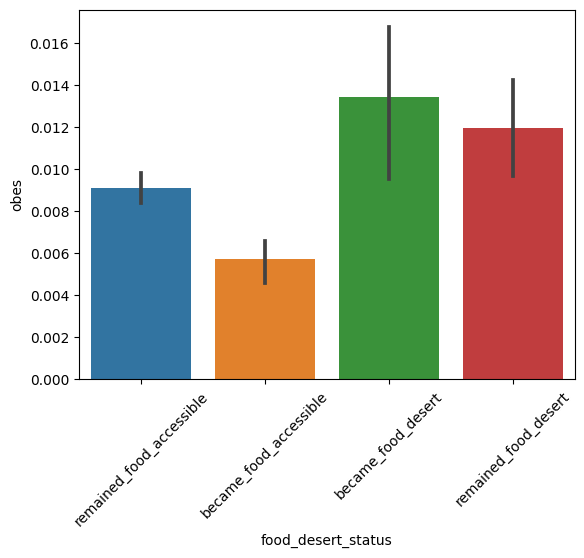

In [96]:
sns.barplot(x=data_2019_dc_CDC['food_desert_status'], y=data_2019_dc_CDC['obes']);
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'remained_food_accessible'),
  Text(1, 0, 'became_food_accessible'),
  Text(2, 0, 'became_food_desert'),
  Text(3, 0, 'remained_food_desert')])

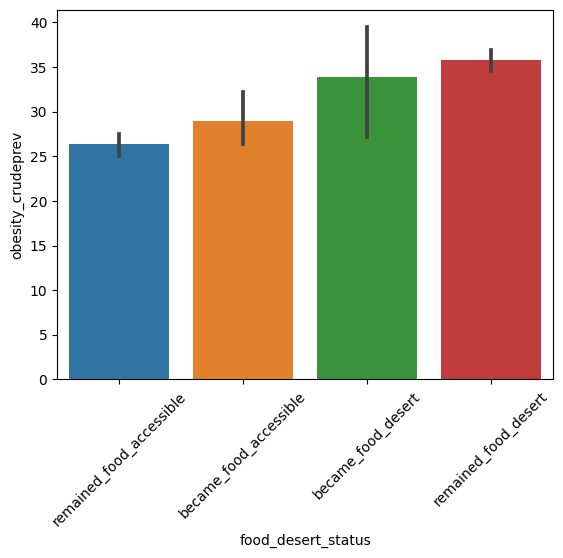

In [97]:
sns.barplot(x=data_2019_dc_CDC['food_desert_status'], y=data_2019_dc_CDC['obesity_crudeprev']);
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'remained_food_accessible'),
  Text(1, 0, 'became_food_accessible'),
  Text(2, 0, 'became_food_desert'),
  Text(3, 0, 'remained_food_desert')])

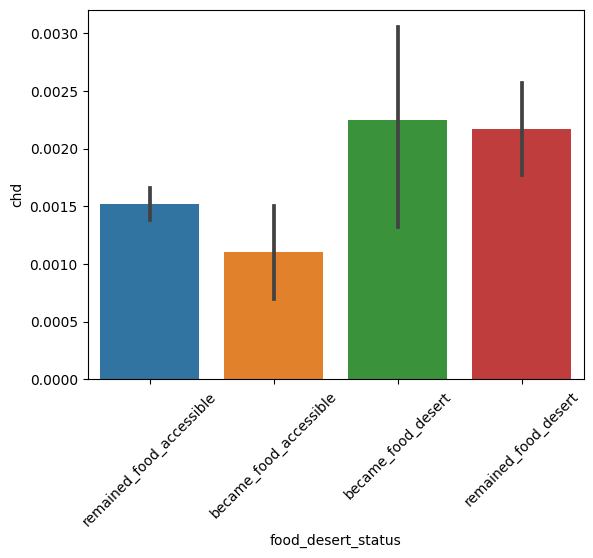

In [98]:
sns.barplot(x=data_2019_dc_CDC['food_desert_status'], y=data_2019_dc_CDC['chd']);
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'remained_food_accessible'),
  Text(1, 0, 'became_food_accessible'),
  Text(2, 0, 'became_food_desert'),
  Text(3, 0, 'remained_food_desert')])

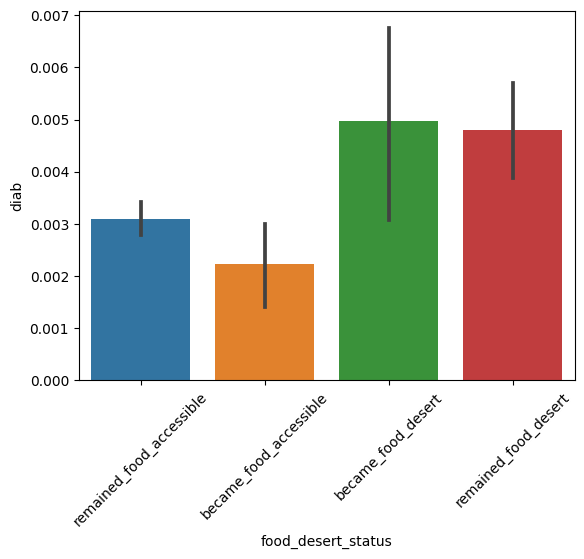

In [99]:
sns.barplot(x=data_2019_dc_CDC['food_desert_status'], y=data_2019_dc_CDC['diab']);
plt.xticks(rotation=45)

--------

## 6. Output Files

This section will output csv files for use in other notebooks. Feel free to add others if you need.

In [100]:
data_2010_dc.to_csv('../output_data/data_2010_dc_cleaned.csv')

In [101]:
data_2019_dc.to_csv('../output_data/data_2019_dc_cleaned.csv')

In [102]:
data_2019_dc_1and10.to_csv('../output_data/data_2019_dc_1and10_cleaned.csv')

In [103]:
data_2019_dc_halfand10.to_csv('../output_data/data_2010_dc_halfand10_cleaned.csv')

In [122]:
data_2019_dc_CDC.to_csv('../output_data/data_2019_dc_1and10_CDC_cleaned.csv')

-------

# Cell Graveyard

Team can go through these together and decide if we should delete them or leave them as evidence of efforts.

In [104]:

#data_2019[~data_2019['medianfamilyincome'].isnull()].sort_values('pop2010', ascending=False).head(2)

In [105]:

# a = df_2010_small[['censustract','lilatracts_1and10']].loc[df_2010_small.censustract.isin(set(df_2019_small.censustract))]
# a.head(1)

In [106]:
# b = df_2019_small[['censustract','lilatracts_1and10']].loc[df_2019_small.censustract.isin(set(df_2010_small.censustract))]
# b.head(1)

In [107]:
# a.lilatracts_1and10.value_counts(normalize=1)

In [108]:
# b.lilatracts_1and10.value_counts(normalize=1)

In [109]:
# a = a.reset_index().drop(columns='index')

In [110]:
# b = b.reset_index().drop(columns='index')

In [111]:
# changed_tract_lilatracts_1and10 = list(a[a.lilatracts_1and10 != b.lilatracts_1and10].censustract)
# len(changed_tract_lilatracts_1and10)

In [112]:
# data_2019_dc[data_2019_dc['food_desert_status']=="remained_food_desert"].count()


In [113]:
# data_2019_dc[data_2019_dc['food_desert_status']=="remained_food_desert"]


In [114]:
#data_2010_dc[data_2010_dc.lilatracts_1and10==0].censustract

In [115]:
# data_2019_dc_1and10 = data_2019_dc.copy()


In [116]:
# data_2019_dc_halfand10 = data_2019_dc.copy()


In [117]:
# # places that turned into food deserts
# get_lila_0_1('District of Columbia', 'DC', 'lilatracts_1and10')

In [118]:
# #places that turned into food-accessible areas
# get_lila_1_0('District of Columbia', 'DC', 'lilatracts_1and10')

In [119]:
# #places that remained food-accessible
# get_lila_0_0('District of Columbia', 'DC', 'lilatracts_1and10')

In [120]:
# #places that remained food deserts
# get_lila_1_1('District of Columbia', 'DC', 'lilatracts_1and10')

---

# Derry's Playground

In [121]:
data_2019_dc_CDC[:1]

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation,bp,chd,chol,diab,obes,mhlth
0,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.63435,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.32945,0.006737,3.897334,0.0797,9.20089,0.188157,9.260688,0.344776,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible,Washington,1150000.0,1.100100e+10,1150000-11001000100,4890.0,3.6,"( 3.1, 4.7)",15.8,"(15.0, 16.7)",26.0,"(25.1, 26.8)",21.8,"(20.9, 22.8)",73.1,"(71.9, 74.3)",6.8,"( 6.6, 7.0)",7.7,"( 7.4, 8.1)",3.7,"( 3.4, 4.1)",75.5,"(74.5, 76.5)",85.0,"(83.7, 85

In [139]:
df_small = pd.read_csv('../output_data/data_2019_dc_1and10_CDC_cleaned_small.csv', index_col=0)

In [140]:
df_small[:1]

,tractwhite,tractblack,tractasian,tractomultir,tracthispanic,tractnhopi,tractaian,food_desert_status,bp,chd,chol,diab,obes,mhlth,status_2019
0,0.856922,0.020247,0.038758,0.024875,0.057077,0.000386,0.001735,remained_food_accessible,0.0149,0.0008,0.0061,0.001,0.0035,0.0015,accessible


In [141]:
df_small

,tractwhite,tractblack,tractasian,tractomultir,tracthispanic,tractnhopi,tractaian,food_desert_status,bp,chd,chol,diab,obes,mhlth,status_2019
0,0.856922,0.020247,0.038758,0.024875,0.057077,0.000386,0.001735,remained_food_accessible,0.0149,0.0008,0.0061,0.0010,0.0035,0.0015,accessible
1,0.701503,0.061799,0.115008,0.053209,0.065617,0.001193,0.001670,remained_food_accessible,0.0064,0.0004,0.0030,0.0006,0.0057,0.0067,accessible
2,0.815707,0.027566,0.065014,0.030860,0.059466,0.000520,0.000867,remained_food_accessible,0.0119,0.0005,0.0041,0.0007,0.0029,0.0019,accessible
3,0.828236,0.020943,0.053036,0.035106,0.060871,0.000151,0.001657,remained_food_accessible,0.0099,0.0004,0.0036,0.0006,0.0028,0.0015,accessible
4,0.790241,0.031686,0.065272,0.033587,0.077947,0.000000,0.001267,remained_food_accessible,0.0521,0.0032,0.0229,0.0046,0.0129,0.0057,accessible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.730127,0.045063,0.105823,0.046582,0.069367,0.000000,0.003038,remained_food_accessible,0.0320,0.0011,0.0109,0.0018,0.0090,0.0054,accessible
175,0.770821,0.041791,0.106052,0.040443,0.040144,0.000449,0.000300,remained_food_accessible,0.0044,0.0002,0.0017,0.0003,0.0026,0.0029,accessible
176,0.017802,0.937692,0.004604,0.023634,0.014426,0.000000,0.001842,remained_food_accessible,0.0216,0.0015,0.0085,0.0035,0.0112,0.0058,accessible
177,0.418676,0.439200,0.035916,0.051052,0.046947,0.000770,0.007440,remained_food_accessible,0.0212,0.0012,0.0087,0.0022,0.0058,0.0020,accessible


In [146]:
df_small

,tractwhite,tractblack,tractasian,tractomultir,tracthispanic,tractnhopi,tractaian,food_desert_status,bp,chd,chol,diab,obes,mhlth,status_2019
0,0.856922,0.020247,0.038758,0.024875,0.057077,0.000386,0.001735,remained_food_accessible,0.0149,0.0008,0.0061,0.0010,0.0035,0.0015,accessible
1,0.701503,0.061799,0.115008,0.053209,0.065617,0.001193,0.001670,remained_food_accessible,0.0064,0.0004,0.0030,0.0006,0.0057,0.0067,accessible
2,0.815707,0.027566,0.065014,0.030860,0.059466,0.000520,0.000867,remained_food_accessible,0.0119,0.0005,0.0041,0.0007,0.0029,0.0019,accessible
3,0.828236,0.020943,0.053036,0.035106,0.060871,0.000151,0.001657,remained_food_accessible,0.0099,0.0004,0.0036,0.0006,0.0028,0.0015,accessible
4,0.790241,0.031686,0.065272,0.033587,0.077947,0.000000,0.001267,remained_food_accessible,0.0521,0.0032,0.0229,0.0046,0.0129,0.0057,accessible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.730127,0.045063,0.105823,0.046582,0.069367,0.000000,0.003038,remained_food_accessible,0.0320,0.0011,0.0109,0.0018,0.0090,0.0054,accessible
175,0.770821,0.041791,0.106052,0.040443,0.040144,0.000449,0.000300,remained_food_accessible,0.0044,0.0002,0.0017,0.0003,0.0026,0.0029,accessible
176,0.017802,0.937692,0.004604,0.023634,0.014426,0.000000,0.001842,remained_food_accessible,0.0216,0.0015,0.0085,0.0035,0.0112,0.0058,accessible
177,0.418676,0.439200,0.035916,0.051052,0.046947,0.000770,0.007440,remained_food_accessible,0.0212,0.0012,0.0087,0.0022,0.0058,0.0020,accessible


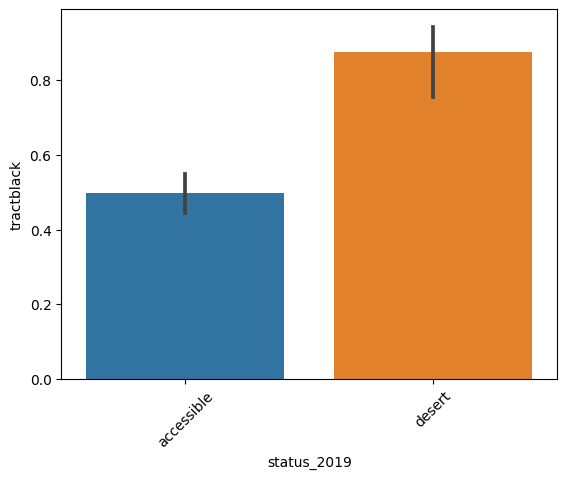

In [151]:
sns.barplot(x=df_small['status_2019'], y=df_small['tractblack'])
plt.xticks(rotation=45);

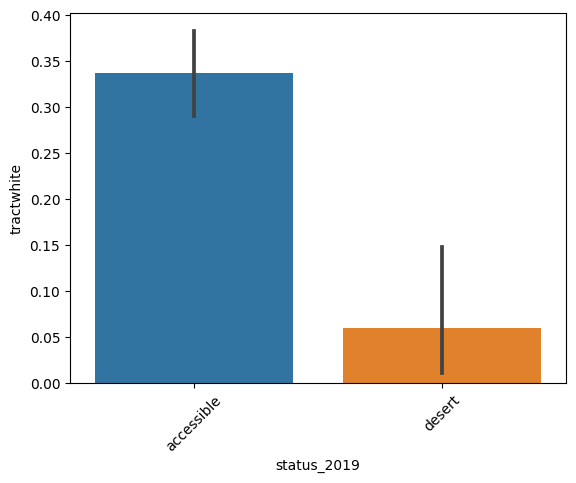

In [164]:
sns.barplot(x=df_small['status_2019'], y=df_small['tractwhite'], )
plt.xticks(rotation=45);

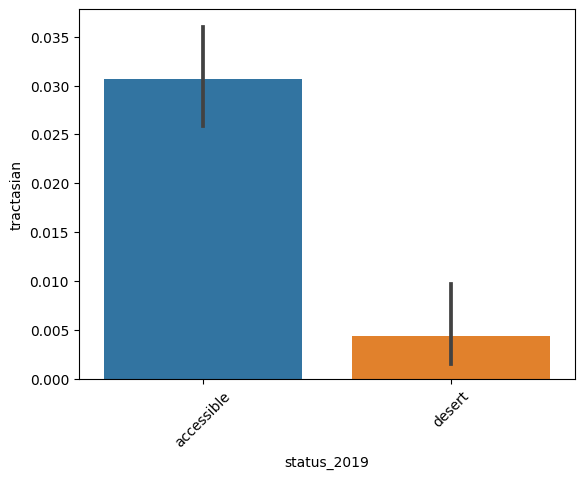

In [153]:
sns.barplot(x=df_small['status_2019'], y=df_small['tractasian'])
plt.xticks(rotation=45);

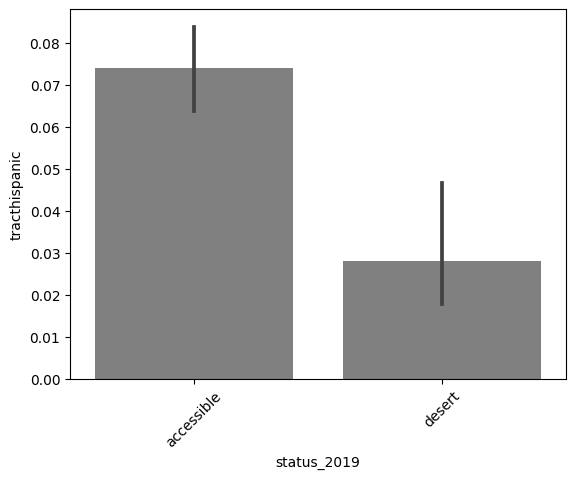

In [159]:
sns.barplot(x=df_small['status_2019'], y=df_small['tracthispanic'], color='grey')
plt.xticks(rotation=45);